In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datetime import datetime
import seaborn as sns
import pandas as pd
import os 

In [10]:
try:
    filename = "floorsheet_{}.csv".format(datetime.today().strftime('%Y_%m_%d'))
    data = pd.read_csv(os.path.join('..','data','floorsheet',filename),index_col=0) 

except:
    filename = [file for file in os.listdir(os.path.join('..','data','floorsheet')) if 'floorsheet' in file][-1]
    data = pd.read_csv(os.path.join('..','data','floorsheet',filename),index_col=0) 



In [11]:
data['BuyerBroker'] = data['BuyerBroker'].apply(lambda x:str(x))
data['SellerBroker'] = data['SellerBroker'].apply(lambda x:str(x))

In [12]:
data.head()

,S.N,ContractNo,StockSymbol,BuyerBroker,SellerBroker,Quantity,Rate,Amount
0,1,2021070604015212,SPDL,13,26,22,396.0,8712.0
1,2,2021070601012192,NABIL,56,44,34,1301.0,44234.0
2,3,2021070601012191,NABIL,56,58,45,1301.0,58545.0
3,4,2021070601012190,NABIL,56,11,21,1301.0,27321.0
4,5,2021070603018894,NIFRA,45,4,10,484.0,4840.0


In [13]:
data.describe()

,S.N,ContractNo,Quantity,Rate,Amount
count,46310.00000,4.631000e+04,46310.000000,46310.000000,4.631000e+04
mean,23155.50000,2.021071e+15,218.855733,960.878530,9.121180e+04
std,13368.68982,1.159891e+06,2844.216118,1589.995055,5.284124e+05
min,1.00000,2.021071e+15,1.000000,9.900000,2.760000e+02
25%,11578.25000,2.021071e+15,20.000000,402.000000,1.302000e+04
50%,23155.50000,2.021071e+15,50.000000,500.000000,3.301000e+04
75%,34732.75000,2.021071e+15,100.000000,900.000000,8.080000e+04
max,46310.00000,2.021071e+15,484850.000000,22396.000000,5.280000e+07


## Top Turnover

In [14]:
def get_broker_turnover(df):
    buy_df = data.groupby(['BuyerBroker'])[['Amount']].sum().sort_values(by='Amount',ascending=False)
    buy_df['Broker'] = buy_df.index
    buy_df = buy_df.rename(columns={"Amount":"Bought"})
    sell_df = data.groupby(['SellerBroker'])[['Amount']].sum().sort_values(by='Amount',ascending=False)
    sell_df['Broker'] = sell_df.index
    sell_df = sell_df.rename(columns={"Amount":"Sold"})
    result = pd.merge(buy_df, sell_df, on="Broker")
    result['Total Turnover'] = result['Bought']+result['Sold']
    result = result.sort_values(by='Total Turnover', ascending = False)
    
    transformed_df = result[:5].melt(id_vars=["Broker"], 
        var_name="Type", 
        value_name="Amount")
    transformed_df['Amount'] = transformed_df['Amount']/10000000
    return transformed_df
    
    

In [15]:
turnover_df = get_broker_turnover(data)
turnover_df

,Broker,Type,Amount
0,58,Bought,25.657052
1,44,Bought,24.645819
2,20,Bought,19.094370
3,34,Bought,20.341850
4,45,Bought,20.269644
5,58,Sold,32.669979
6,44,Sold,25.671668
7,20,Sold,23.515107
8,34,Sold,13.775016
9,45,Sold,11.433416


<Figure size 51840x51840 with 0 Axes>

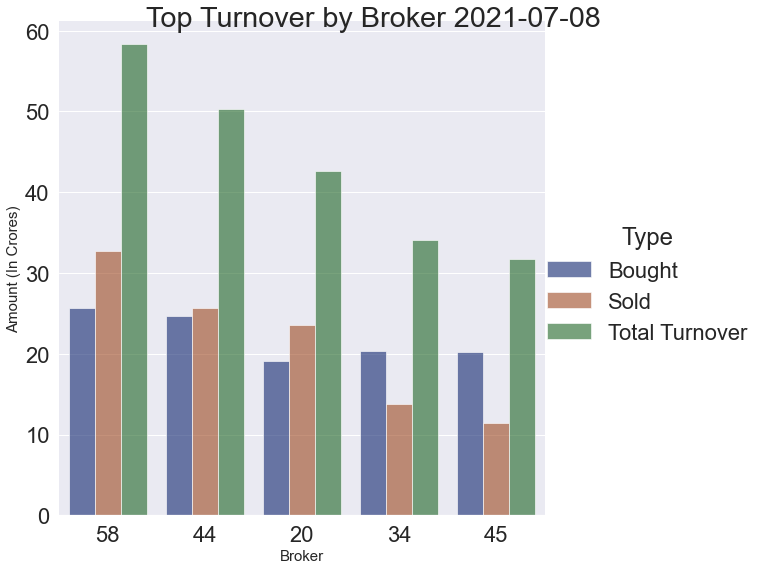

In [17]:
def top_broker_chart(transformed_df):
    plt.figure(figsize=(720,720))
    sns.set_theme(style="whitegrid")
    sns.set_style("darkgrid")
    palette=("Blues_d")
    sns.set(font_scale = 2)
    # sns.set_context("poster")

    g = sns.catplot(
        data=transformed_df, kind="bar",
        x="Broker", y="Amount", hue="Type",
        ci="sd", palette="dark", alpha=.6, height=8
    )
    g.despine(left=True)
    g.set_axis_labels("Broker", "Amount (In Crores)",size = 15)
    chart_title = f"Top Turnover by Broker {datetime.today().strftime('%Y-%m-%d')}"
    filename = f"top_turnover_by_broker_{datetime.today().strftime('%Y_%m_%d')}"
    g.fig.suptitle(chart_title)
    g.fig.savefig(os.path.join("..","images",filename))
    

top_broker_chart(turnover_df)